In [1]:
# libraries
using Metrics          # r2-score
using Random
using Distributions
using Plots; gr()
using Printf

using CSV
using DataFrames
using MLJ              # blobs

In [2]:
function cross_entropy_loss(w, X, y)
    xpn = -y .* (X * w)
    res = log.(1 .+ exp.(xpn))    
    loss = mean(res)
end

# teste da função
X_teste = [1 2 4;
           3 2 6;
           7 9 3
           12 1 7]
N = size(X_teste)[1]
d = size(X_teste)[2]

y_teste = [0.2;
           0.7;
           0.9
           1.4]

rng = Random.seed!(1)            # generate seed
w_teste = randn(rng, d)          # generate initial w vector

cross_entropy_loss(w_teste, X_teste, y_teste)


0.8299617724333166

In [3]:
function cross_entropy_gradient(w, X, y)
    xpn = -y .* (X * w)

    numerator = (y .* X)
    denominator = log.( 1 .+ exp.(xpn) )
    res = numerator ./ denominator
    grad = -mean(res, dims=1)'   # média por coluna
end

# teste da função
cross_entropy_gradient(w_teste, X_teste, y_teste)

3×1 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
 -51.196738756713856
 -59.85676752472432
 -23.424401598076734

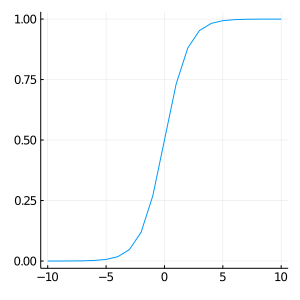

In [4]:
sigmoid(z) = 1 ./ (1 .+ exp.(-z))

# teste da função
a = -10:10
b = sigmoid(a)
gr()
plot(a, b, legend=false, size=(300,300))

In [5]:
function predict_logistic(w, X)
    N = size(X)[1]
    Xe = hcat(ones(N), X)
    ŷ = (sigmoid(w' * Xe))'
end

# teste da função
rng = Random.seed!(1)
w_teste = randn(rng, d+1)
predict_logistic(w_teste, X_teste)

4×1 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
 0.5178934131851931
 0.05394639393700156
 0.01746756487553422
 0.8344511108124059

In [10]:
function train_logistic(X, y, learning_rate = 1e-5, num_iterations = 5000, return_history = false)

    N = size(X)[1]
    d = size(X)[2]
    Xe = hcat(ones(N), X)      # add ones to first column

    rng = Random.seed!(1)      # generate seed
    w0 = randn(rng, d+1)       # generate random initial w vector
    
    w = copy(w0)
    cross_entropy_loss_history = Vector{Float64}()

    for t in 1:num_iterations
        if return_history
            push!(cross_entropy_loss_history, cross_entropy_loss(w, Xe, y))
        end
        g = cross_entropy_gradient(w, Xe, y)
        w = w + learning_rate .* g
    end
    
    if return_history
        return (w, cross_entropy_loss_history)
    else
        return w
    end
end

# teste da função
w_logistic, w_history = train_logistic(X_teste, y_teste, 1e-5, 10, true)
display(w_logistic)
display(w_history)

4×1 Array{Float64,2}:
  0.291508856082641
  0.31337966956435737
 -0.6035134159848244
 -0.05082078875759023

10-element Array{Float64,1}:
 0.9203476266953606
 0.9608451196892394
 0.9899041784151641
 1.0129154143146109
 1.0320981240846987
 1.0486124512969957
 1.0631495956638926
 1.0761577019393094
 1.087945225072551
 1.0987341852480084

### Create blobs

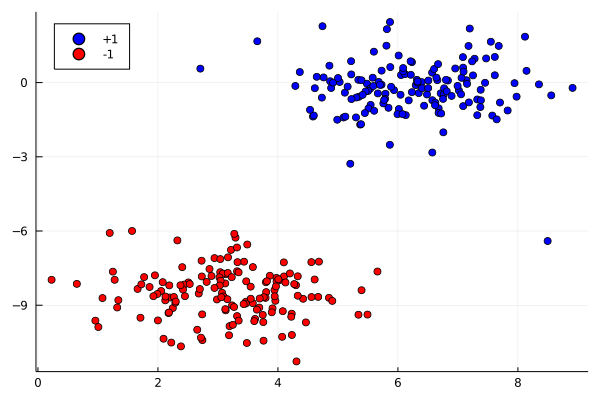

In [7]:
N = 300
X, y = make_blobs(N, 2; centers=2, cluster_std = 1, rng=7)
X = DataFrame(X) |> Array
y[ y .== 2 ] .= -1
y = y |> Array
y = y * 1.0

scatter(X[y .== 1, 1], X[y .== 1, 2], markercolor = "blue", label = "+1", legend = :topleft)
scatter!(X[y .== -1, 1], X[y .== -1, 2],  markercolor = "red",  label = "-1")

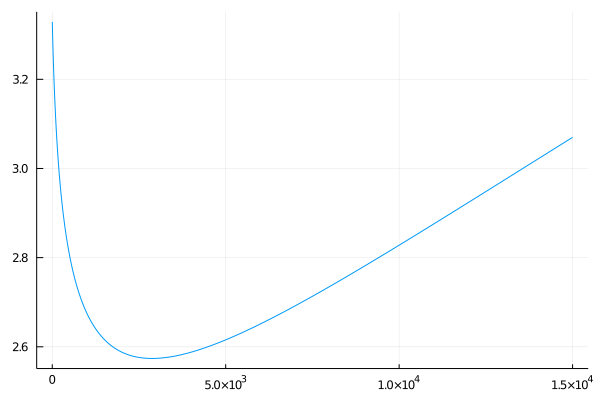

In [8]:
npoints = 15000
w_logistic, w_history = train_logistic(X, y, 1e-5, npoints, true)

plot(1:npoints, w_history, legend=false)